In [3]:
import numpy as np
from sparse_ir import FiniteTempBasis, KernelFFlat, TauSampling
from matplotlib import pylab as plt

def __oversample(x: np.ndarray):
    xmid = 0.5*(x[1:] + x[:-1])
    return np.unique(np.hstack((x, xmid)))

def _oversample(x: np.ndarray, n: int =1):
    for i in range(n):
        x = __oversample(x)
    return x

In [4]:
wmax = 1
lambda_ = 1e+3
beta = lambda_/wmax

basis = FiniteTempBasis("F", beta, wmax, eps=1e-4)
smpl_p = basis.default_tau_sampling_points()
#smpl_p = np.hstack((0, smpl_p, beta))

In [5]:
def cond_num(basis, smpl_p):
    test_p = 0.5*(smpl_p[1:] + smpl_p[:-1])
    print("smpl", smpl_p[:10])
    print("test", test_p[:10])
    u, s, vt = np.linalg.svd(basis.u(smpl_p).T)
    print("cond", s[0]/s[-1])
    u, s, vt = np.linalg.svd(basis.u(test_p).T)
    print("cond", s[0]/s[-1])
    prj = basis.u(test_p).T @ np.linalg.pinv(basis.u(smpl_p).T, rcond=1e-10)
    u, s, vt = np.linalg.svd(prj)
    print("cond", s[0]/s[-1], prj.shape, s)
    print(np.sum(s>1e-1))
    return np.linalg.cond(prj)

In [6]:
sizes = []
conds = []
for i in range(2):
    smp_p_ = _oversample(basis.default_tau_sampling_points(),i)
    sizes.append(smp_p_.size)
    conds.append(cond_num(basis, smp_p_))
sizes = np.asarray(sizes)
conds = np.asarray(conds)

smpl [  0.30845067   0.61690135   2.15553091   4.85913411   9.23929588
  16.2836445   27.79807996  46.87388433  78.57294377 130.83341031]
test [  0.46267601   1.38621613   3.50733251   7.049215    12.76147019
  22.04086223  37.33598215  62.72341405 104.70317704 172.75444186]
cond 17.870800410129977
cond 14.317763312606655
cond 5.5061480742941065 (24, 25) [1.46317365 1.21888737 1.18390855 1.01881111 1.01635646 1.01084927
 1.0088177  1.00437342 1.00425648 1.00415493 1.00322273 1.00129007
 1.00091548 1.0001274  0.99999858 0.99961372 0.99960759 0.99915396
 0.99907142 0.99745458 0.99613446 0.65476574 0.65447821 0.26573453]
24
smpl [ 0.30845067  0.46267601  0.61690135  1.38621613  2.15553091  3.50733251
  4.85913411  7.049215    9.23929588 12.76147019]
test [ 0.38556334  0.53978868  1.00155874  1.77087352  2.83143171  4.18323331
  5.95417455  8.14425544 11.00038304 14.52255734]
cond 15.654708176033791
cond 14.263788682111318
cond 2.9000142909827068e+16 (48, 49) [1.06912378e+00 1.06862258e+00

[25 49]
[5.50614807e+00 1.70510916e+17]


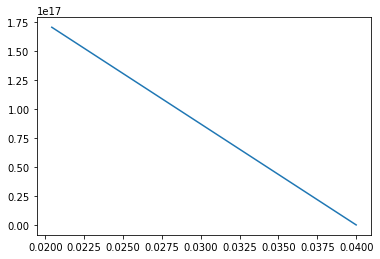

In [7]:

print(sizes)
print(conds)
plt.plot(1/sizes, conds)

In [9]:
sizes2 = []
conds2 = []
smpl_p_ir = None
for eps in [1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16, 1e-18, 1e-20, 1e-22]:
    print(eps)
    basis_ = FiniteTempBasis("F", beta, wmax, eps=eps)
    smpl_p_ = basis_.default_tau_sampling_points()
    sizes2.append(smpl_p_.size)
    conds2.append(TauSampling(basis, sampling_points=smpl_p_).cond)
    smpl_p_ir = smpl_p_
sizes2 = np.asarray(sizes2)
conds2 = np.asarray(conds2)

0.0001
1e-06
1e-08
1e-10
1e-12
1e-14
1e-16


/Users/hiroshi/git/sparse-ir/src/sparse_ir/basis.py:208: UserWarning: 
Basis cutoff is 1e-16, which is below sqrt(eps) with
eps = 4.9e-32.  Expect singular values and basis functions
for large l to have lower precision than the cutoff.

  u, s, v = sve.compute(self.kernel, eps)


1e-18


/Users/hiroshi/git/sparse-ir/src/sparse_ir/basis.py:208: UserWarning: 
Basis cutoff is 1e-18, which is below sqrt(eps) with
eps = 4.9e-32.  Expect singular values and basis functions
for large l to have lower precision than the cutoff.

  u, s, v = sve.compute(self.kernel, eps)


1e-20


/Users/hiroshi/git/sparse-ir/src/sparse_ir/basis.py:208: UserWarning: 
Basis cutoff is 1e-20, which is below sqrt(eps) with
eps = 4.9e-32.  Expect singular values and basis functions
for large l to have lower precision than the cutoff.

  u, s, v = sve.compute(self.kernel, eps)


1e-22


/Users/hiroshi/git/sparse-ir/src/sparse_ir/basis.py:208: UserWarning: 
Basis cutoff is 1e-22, which is below sqrt(eps) with
eps = 4.9e-32.  Expect singular values and basis functions
for large l to have lower precision than the cutoff.

  u, s, v = sve.compute(self.kernel, eps)


In [ ]:
from numpy.polynomial.legendre import leggauss
sizes3 = []
conds3 = []
for nsmpl in [200, 500, 1000, 10000]:
    x, w = leggauss(nsmpl)
    sizes3.append(x.size)
    smpl_p = 0.5 * (x+1) * beta
    conds3.append(TauSampling(basis, sampling_points=smpl_p).cond)
sizes3 = np.asarray(sizes3)
conds3 = np.asarray(conds3)

[  34   67  133  265  529 1057 2113 4225]


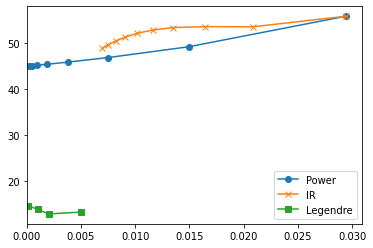

In [ ]:
print(sizes)
plt.plot(1/sizes, conds, label="Power", marker="o")
plt.plot(1/sizes2, conds2, label="IR", marker="x")
plt.plot(1/sizes3, conds3, label="Legendre", marker="s")
plt.xlim([0,None])
plt.legend()